<a href="https://colab.research.google.com/github/HowardHNguyen/Data_Science_for_Marketing_Solutions/blob/main/ABTesting_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Load Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/data/WA_Fn-UseC_-Marketing-Campaign-Eff-UseC_-FastF.csv')

In [5]:
df.shape

(548, 7)

In [9]:
df

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
...,...,...,...,...,...,...,...
543,10,Large,919,2,1,4,64.34
544,10,Large,920,14,2,1,50.20
545,10,Large,920,14,2,2,45.75
546,10,Large,920,14,2,3,44.29


There are a total of seven variables in the dataset.

1. MarketID: unique identifier for market
2. MarketSize: size of market area by sales
3. LocationID: unique identifier for store location
4. AgeOfStore: age of store in years
5. Promotion: one of three promotions that was tested
6. week: one of four weeks when the promotions were run
7. SalesInThousands: sales amount for specific LocationID, Promotion, and week

# 2. Data Analysis
Let's take a deeper look at the data. In this section, we are going to focus on understanding the distributions of sales, market sizes, store locations, and store ages used to test different promotions. The goal of this analysis is to make sure the controls and attributes of each of the promotion groups are symmetrically distributed, so that the promotion performances among different groups are comparable to each other.

The total sales distributions across different promotions can be visualized using the following code:

<ipython-input-11-3ae9ddd8dcd1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax = df.groupby('Promotion').sum()['SalesInThousands'].plot.pie(figsize=(7, 7),autopct='%1.0f%%')


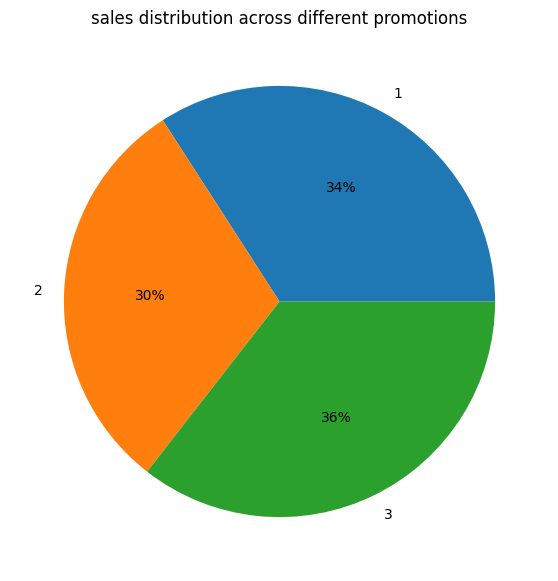

In [11]:
ax = df.groupby('Promotion').sum()['SalesInThousands'].plot.pie(figsize=(7, 7),autopct='%1.0f%%')

ax.set_ylabel('')
ax.set_title('sales distribution across different promotions')

plt.show()

As we can see from this code, we are grouping the data by the Promotion column and aggregating the total sales amount by summing over the SalesInThousands column. Using a pie chart, we can easily visualize how much of the pie each group takes.

We found the promotion group 3 has the largest aggregate sales among the three groups. However, each promotion group takes roughly about one third of the total sales during the promotion weeks. Similarly, we can also visualize the compositions of different market sizes in each promotion group. Take a look at the following code:

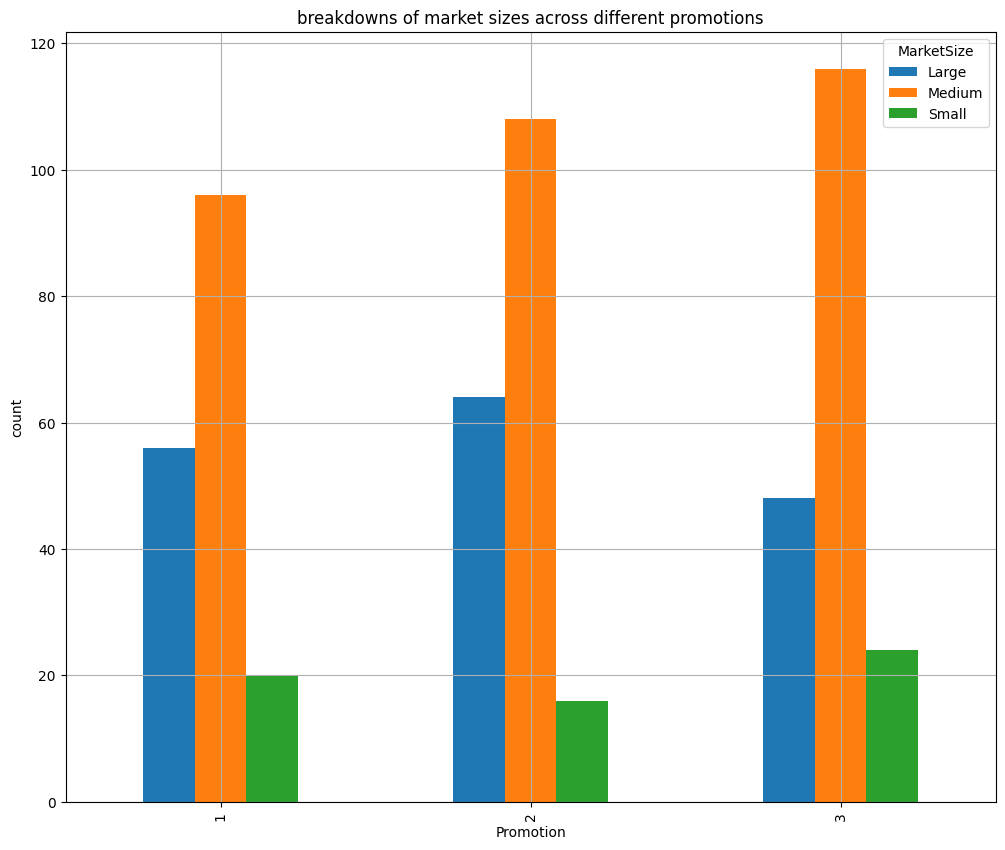

In [46]:
ax = df.groupby(['Promotion', 'MarketSize']).count()['MarketID'].unstack('MarketSize').plot(
    kind='bar',figsize=(12,10),grid=True,)

ax.set_ylabel('count')
ax.set_title('breakdowns of market sizes across different promotions')

plt.show()

We can use stacked bar chart to display the bar plot

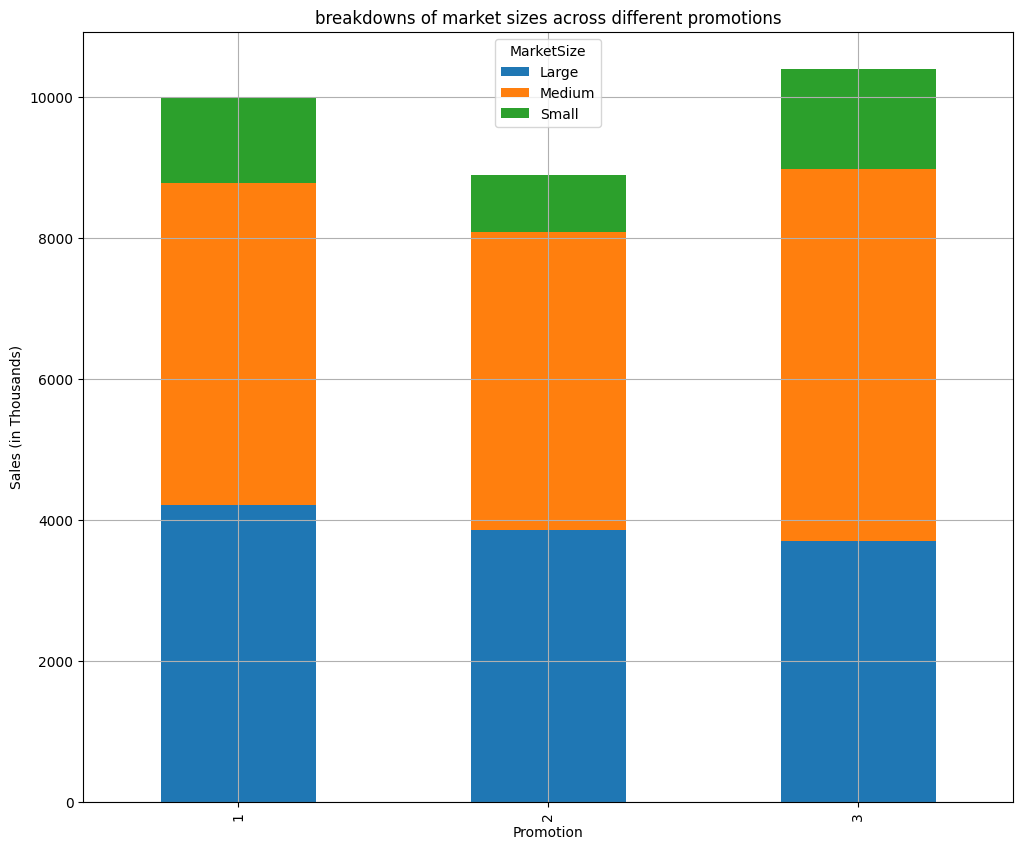

In [47]:
ax = df.groupby(['Promotion', 'MarketSize']).sum()['SalesInThousands'].unstack('MarketSize').plot(
    kind='bar', figsize=(12,10),grid=True,stacked=True)

ax.set_ylabel('Sales (in Thousands)')
ax.set_title('breakdowns of market sizes across different promotions')

plt.show()

As you can see from this bar chart, the medium market size occupies the most among all three promotion groups, while the small market size occupies the least. We can verify that the compositions of different market sizes are similar among the three promotion groups from this plot.

Another attribute, AgeOfStore, and its overall distribution across all different promotions groups, can be visualized by using the following code:

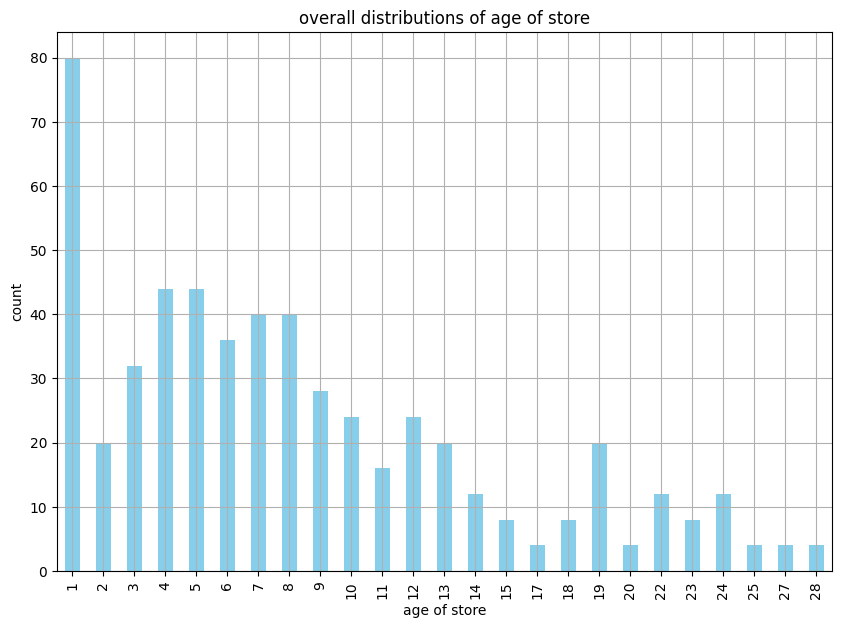

In [49]:
ax = df.groupby('AgeOfStore').count()['MarketID'].plot(
    kind='bar',color='skyblue',figsize=(10,7),grid=True)

ax.set_xlabel('age of store')
ax.set_ylabel('count')
ax.set_title('overall distributions of age of store')

plt.show()

As you can see from this plot, a large number of stores are 1 year old and the majority of stores are 10 years old or less. However, what we are more interested in is whether the stores in the three different promotion groups have similar store age profiles. Take a look at the following code:

<function matplotlib.pyplot.show(close=None, block=None)>

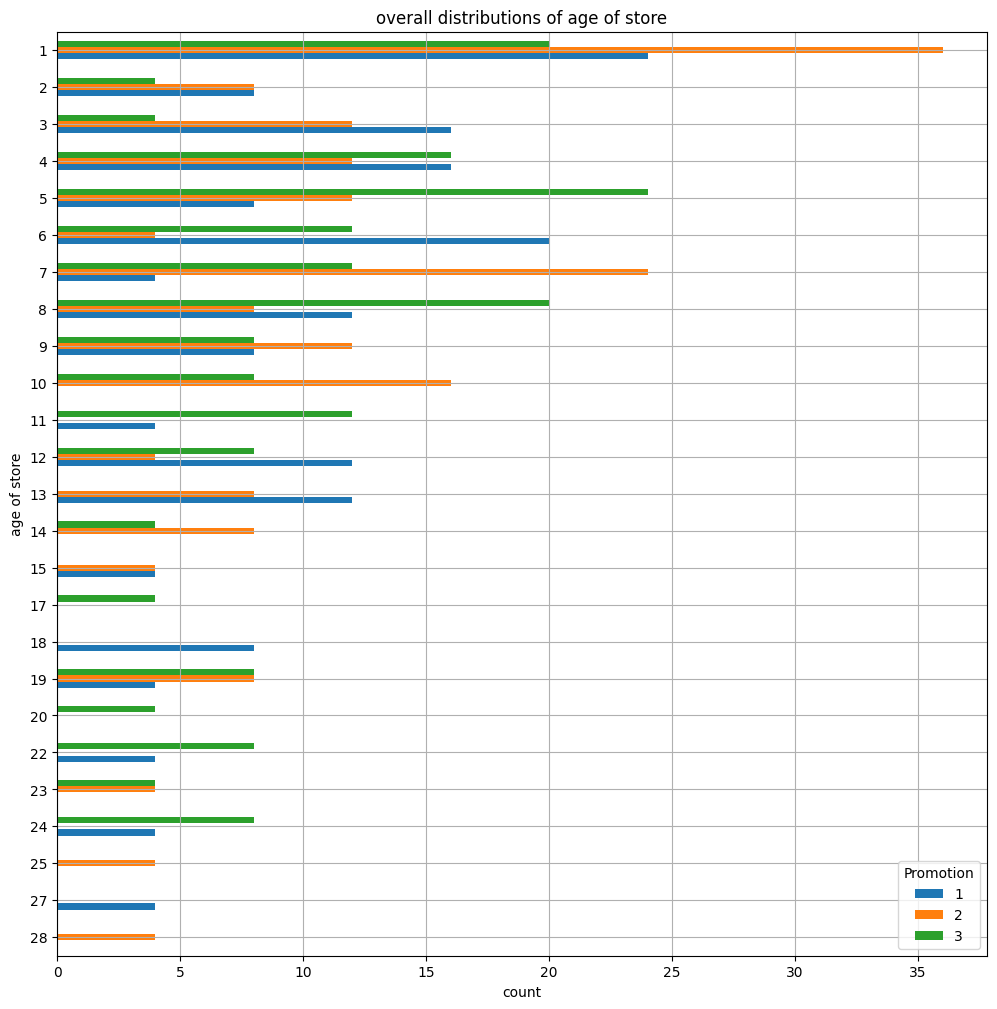

In [55]:
ax = df.groupby(['Promotion', 'AgeOfStore']).count()['MarketID'].unstack('Promotion').iloc[::-1].plot(kind='barh',figsize=(12,12),grid=True)
ax.set_ylabel('age of store')
ax.set_xlabel('count')
ax.set_title('overall distributions of age of store')
plt.show

The store age distributions across the three different promotion groups seem to align with each other, but it is quite difficult to digest the information presented from this plot. It will be easier to look at the summary statistics of store ages across the three promotion groups. Take a look at the following code:

In [53]:
df.groupby('Promotion').describe()['AgeOfStore']

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


As you may notice from this output, it is much easier to understand the overall store age distributions from these summary statistics. We can see that all three test groups seem to have similar store age profiles. The average ages of stores for the three groups are 8–9 years old and the majority of the stores are 10–12 years old or younger.

By analyzing how each promotion or test group is comprised, we could verify that the store profiles are similar to each other. This suggests that the sample groups are well controlled and the A/B testing results will be meaningful and trustworthy.

# **Statistical hypothesis testing**
The ultimate goal of A/B testing of different marketing strategies is to find out which strategy is the most efficient and works the best among the others. As briefly discussed in an earlier section, a strategy having a higher response number does not necessarily mean that it outperforms the rest. We will discuss how we can use the t-test to evaluate the relative performances of different marketing strategies and see which strategy wins over the others with significance.

In Python, there are two approaches to computing the t-value and p-value in a t-test. We will demonstrate both approaches in this section, and it is up to you to decide which one works more conveniently for you. The two approaches to compute the t-value and p-value for a t-test are as follows:

**Computing t-value and p-value from the equations:** The first approach is to manually calculate the t-value using the equation we have learned in the previous section. As you may recall, there are three things we need to compute to get the t-value—the mean, the standard deviation, and the number of samples. Take a look at the following code:

In [56]:
means = df.groupby('Promotion').mean()['SalesInThousands']
stds = df.groupby('Promotion').std()['SalesInThousands']
ns = df.groupby('Promotion').count()['SalesInThousands']

<ipython-input-56-7f2024b31b18>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = df.groupby('Promotion').mean()['SalesInThousands']
<ipython-input-56-7f2024b31b18>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stds = df.groupby('Promotion').std()['SalesInThousands']


As you can see from this code, you can easily compute the mean, the standard deviation, and the number of samples in each test group by using the mean, std, and count functions respectively. With these, we can compute the t-value using the previously discussed equation. Take a look at the following code:

In [57]:
import numpy as np
t_1_vs_2 = (means.iloc[0] - means.iloc[1]) / np.sqrt(stds.iloc[0]**2/ns.iloc[0] + stds.iloc[1]**2/ns.iloc[1])

In [58]:
t_1_vs_2

6.427528670907475

Using this code, we can compute the t-value for comparing the performances of promotion 1 and promotion 2. The t-value we get from running the code is 6.4275.

From this t-value, we can get the p-value with the following code:

In [59]:
from scipy import stats
df_1_vs_1 = ns.iloc[0] + ns.iloc[1] - 2
p_1_vs_2 = (1 - stats.t.cdf(t_1_vs_2, df_1_vs_1)) * 2

In [60]:
df_1_vs_1

358

In [61]:
p_1_vs_2

4.143296816749853e-10

In [62]:
means = df.groupby('Promotion').mean()['SalesInThousands']
means

<ipython-input-62-7213267b084f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = df.groupby('Promotion').mean()['SalesInThousands']


Promotion
1    58.099012
2    47.329415
3    55.364468
Name: SalesInThousands, dtype: float64

# **TESTING WITH OTHER PLOTS**

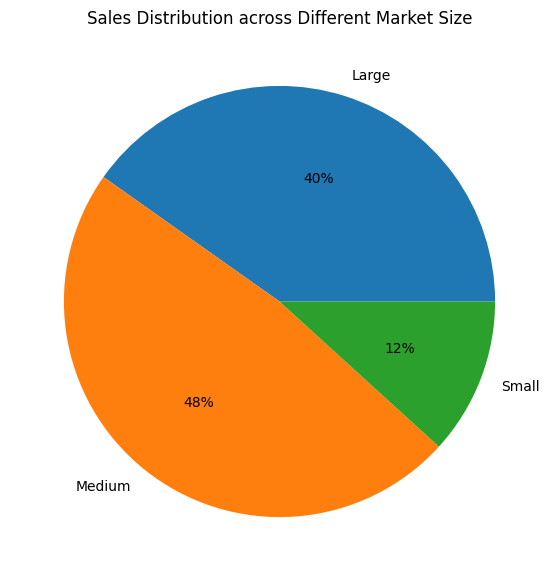

In [17]:
ax = df.groupby('MarketSize').sum()['SalesInThousands'].plot.pie(figsize=(7, 7),autopct='%1.0f%%')

ax.set_ylabel('')
ax.set_title('Sales Distribution across Different Market Size')

plt.show()

#### - Total Sales

In [10]:
df['SalesInThousands'].describe()

count    548.000000
mean      53.466204
std       16.755216
min       17.340000
25%       42.545000
50%       50.200000
75%       60.477500
max       99.650000
Name: SalesInThousands, dtype: float64

#### - Market Size

In [18]:
df.groupby('MarketSize').count()['MarketID']

MarketSize
Large     168
Medium    320
Small      60
Name: MarketID, dtype: int64

#### - Store Age

In [21]:
df['AgeOfStore'].describe()

count    548.000000
mean       8.503650
std        6.638345
min        1.000000
25%        4.000000
50%        7.000000
75%       12.000000
max       28.000000
Name: AgeOfStore, dtype: float64

In [ ]:
ax = df.groupby(
    ['AgeOfStore', 'Promotion']
).count()[
    'MarketID'
].unstack(
    'Promotion'
).iloc[::-1].plot(
    kind='barh',
    figsize=(12,15),
    grid=True
)

ax.set_ylabel('age')
ax.set_xlabel('count')
ax.set_title('overall distributions of age of store')

plt.show()

In [24]:
df.groupby('Promotion').describe()['AgeOfStore']

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


#### - Week Number

In [26]:
df.groupby('week').count()['MarketID']

week
1    137
2    137
3    137
4    137
Name: MarketID, dtype: int64

In [27]:
df.groupby(['Promotion', 'week']).count()['MarketID']

Promotion  week
1          1       43
           2       43
           3       43
           4       43
2          1       47
           2       47
           3       47
           4       47
3          1       47
           2       47
           3       47
           4       47
Name: MarketID, dtype: int64

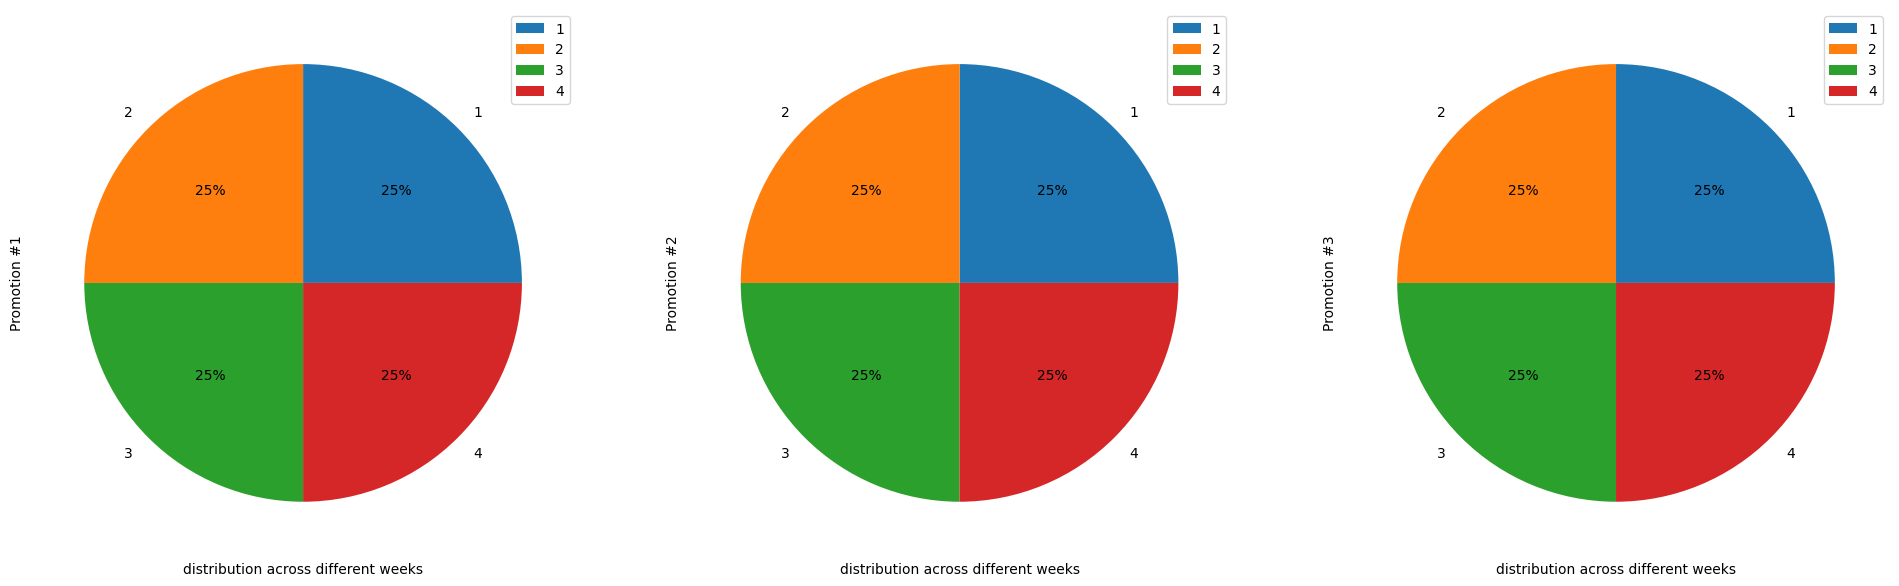

In [28]:
ax1, ax2, ax3 = df.groupby(
    ['week', 'Promotion']
).count()[
    'MarketID'
].unstack('Promotion').plot.pie(
    subplots=True,
    figsize=(24, 8),
    autopct='%1.0f%%'
)

ax1.set_ylabel('Promotion #1')
ax2.set_ylabel('Promotion #2')
ax3.set_ylabel('Promotion #3')

ax1.set_xlabel('distribution across different weeks')
ax2.set_xlabel('distribution across different weeks')
ax3.set_xlabel('distribution across different weeks')

plt.show()

# 3. Statistical Significance

In [29]:
import numpy as np
from scipy import stats

#### - t-test

In [30]:
means = df.groupby('Promotion').mean()['SalesInThousands']
means

<ipython-input-30-7213267b084f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  means = df.groupby('Promotion').mean()['SalesInThousands']


Promotion
1    58.099012
2    47.329415
3    55.364468
Name: SalesInThousands, dtype: float64

In [31]:
stds = df.groupby('Promotion').std()['SalesInThousands']
stds

<ipython-input-31-fb68251a710d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  stds = df.groupby('Promotion').std()['SalesInThousands']


Promotion
1    16.553782
2    15.108955
3    16.766231
Name: SalesInThousands, dtype: float64

In [32]:
ns = df.groupby('Promotion').count()['SalesInThousands']
ns

Promotion
1    172
2    188
3    188
Name: SalesInThousands, dtype: int64

#### - Promotion 1 vs. 2

In [33]:
t_1_vs_2 = (
    means.iloc[0] - means.iloc[1]
)/ np.sqrt(
    (stds.iloc[0]**2/ns.iloc[0]) + (stds.iloc[1]**2/ns.iloc[1])
)

df_1_vs_1 = ns.iloc[0] + ns.iloc[1] - 2

p_1_vs_2 = (1 - stats.t.cdf(t_1_vs_2, df=df_1_vs_1))*2

In [34]:
t_1_vs_2

6.427528670907475

In [35]:
p_1_vs_2

4.143296816749853e-10

**Computing the t-value and p-value using scipy:** Another approach to computing the t-value and p-value is by using the stats module from the scipy package. Take a look at the following code:

#### - using scipy

In [63]:
t, p = stats.ttest_ind(
    df.loc[df['Promotion'] == 1, 'SalesInThousands'].values,
    df.loc[df['Promotion'] == 2, 'SalesInThousands'].values,
    equal_var=False
)

As you can see from this code, the stats module from the scipy package has a function named ttest_ind. This function computes t-value and p-value, given the data. Using this function, we can easily compute t-values and p-values to compare the marketing performances of different promotion or test groups. The results are the same in both approaches. Whether we use the previous approach of manually computing the t-values and p-values from the equation or the approach of using the ttest_ind function in the scipy package, the t-values we get to compare promotion group 1 against 2 and promotion group 1 against 3 are 6.4275 and 1.556; whereas, the p-values we get are 4.29e-10 and 0.121 respectively. And, of course, the interpretations of these t-test results are the same as before.

In [37]:
t

6.42752867090748

In [38]:
p

4.2903687179871785e-10

#### - Promotion 1 vs. 3

In [67]:
t_1_vs_3 = (means.iloc[0] - means.iloc[2])/ np.sqrt(
    (stds.iloc[0]**2/ns.iloc[0]) + (stds.iloc[2]**2/ns.iloc[2]))

df_1_vs_3 = ns.iloc[0] + ns.iloc[1] - 2

p_1_vs_3 = (1 - stats.t.cdf(t_1_vs_3, df=df_1_vs_3))*2

In [68]:
t_1_vs_3

1.556022430775863

In [69]:
p_1_vs_3

0.12058631176434842

#### - using scipy

In [42]:
t, p = stats.ttest_ind(
    df.loc[df['Promotion'] == 1, 'SalesInThousands'].values,
    df.loc[df['Promotion'] == 3, 'SalesInThousands'].values,
    equal_var=False
)

In [43]:
t

1.5560224307758634

In [44]:
p

0.12059147742229478

As you can see from this code, we first compute the degrees of freedom, which is the sum of the number of samples in both groups minus two. With the t-value calculated previously, we can compute the p-value, using the t.cdf function from scipy package's stats module. The p-value we get from running this code is 4.143e-10. This is an extremely small number that is close to 0. As discussed earlier, a p-value closer to 0 suggests that there is a strong evidence against the null hypothesis and that the difference between the two test groups is significant.

The average sales (in thousands) for promotion group 1 is about 58.1, and for promotion group 2 it's about 47.33. From our t-test, we have shown that the marketing performances for these two groups are significantly different and that promotion group 1 outperforms promotion group 2. However, if we run a t-test between the promotion group 1 and promotion group 3, we see different results.

On the surface, the average sales from promotion group 1 (58.1) looks higher than those from promotion group 2 (55.36). However, when we run a t-test between these two groups, we get a t-value of 1.556 and a p-value of 0.121. The computed p-value is much higher than 0.05, which is a generally accepted cut-off line. This suggests that the marketing performance from promotion group 1 is not statistically different from the marketing performance from promotion group 2. Thus, even though promotion group 1's average sales number is higher than the promotion group 2's from the A/B test, the difference is not statistically significant and we cannot conclude that promotion group 1 performs much better than promotion group 2. From these evaluation results, we can conclude that promotion groups 1 and 3 outperform promotion group 2, but the difference between promotion groups 1 and 3 is not statistically significant.

We have shown two approaches to computing t-values and p-values. It may look easier to use the scipy package's out-of-the-box solution to compute those values, but it is always helpful to have the equation in the back in your mind.

In [66]:
# this is just a sample test for loc and iloc usage
# Create a sample DataFrame
data = {'A': [1, 2, 3],
        'B': [4, 5, 6],
        'C': [7, 8, 9]}
df = pd.DataFrame(data, index=['X', 'Y', 'Z'])

# Using loc to select data by labels
print(df.loc['X', 'A'])  # Selects the value in row 'X' and column 'A'

# Using iloc to select data by integer positions
print(df.iloc[2, 2])  # Selects the value in the first row and first column

1
9


loc and iloc are powerful tools for selecting and accessing data in pandas DataFrames and Series, allowing you to retrieve specific rows, columns, or individual elements based on either their labels or integer positions.

Ref: Data Science for Marketing - Hands-on